# 6.4 Supervised Machine Learning: Regression

# This script contains the following:
1. Install the scikit-learn library.
2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
3. Clean your data so that it’s ready for analysis.
4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
5. State your hypothesis in a markdown cell within your Jupyter notebook.
6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
7. Split the data into two sets: a training set and a test set.
8. Run a linear regression on the data.
9. First, fit the model you created to the training set.
10. Then, create a prediction for y on the test set.
11. Create a plot that shows the regression line on the test set.
12. Write your own interpretation of how well the line appears to fit the data in a markdown cell.
13. Check the model performance statistics—MSE and R2 score.
14. Compare the predicted y values with the actual y values in a dataframe.

# Import the libraries 

In [1]:
# Import the libraries, including any necessary modules from scikit-learn.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\bukola\Documents\CF\6.1 Sourcing Open Data\Prepared Data\Superstore_clean.csv")

# 3. Data Cleaning 

In [6]:
df.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.head(20)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [8]:
df.shape

(9994, 21)

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0      0
Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
# Check for duplicate  values
dups = df.duplicated()

In [12]:
dups.shape

(9994,)

# Exploring  data visually

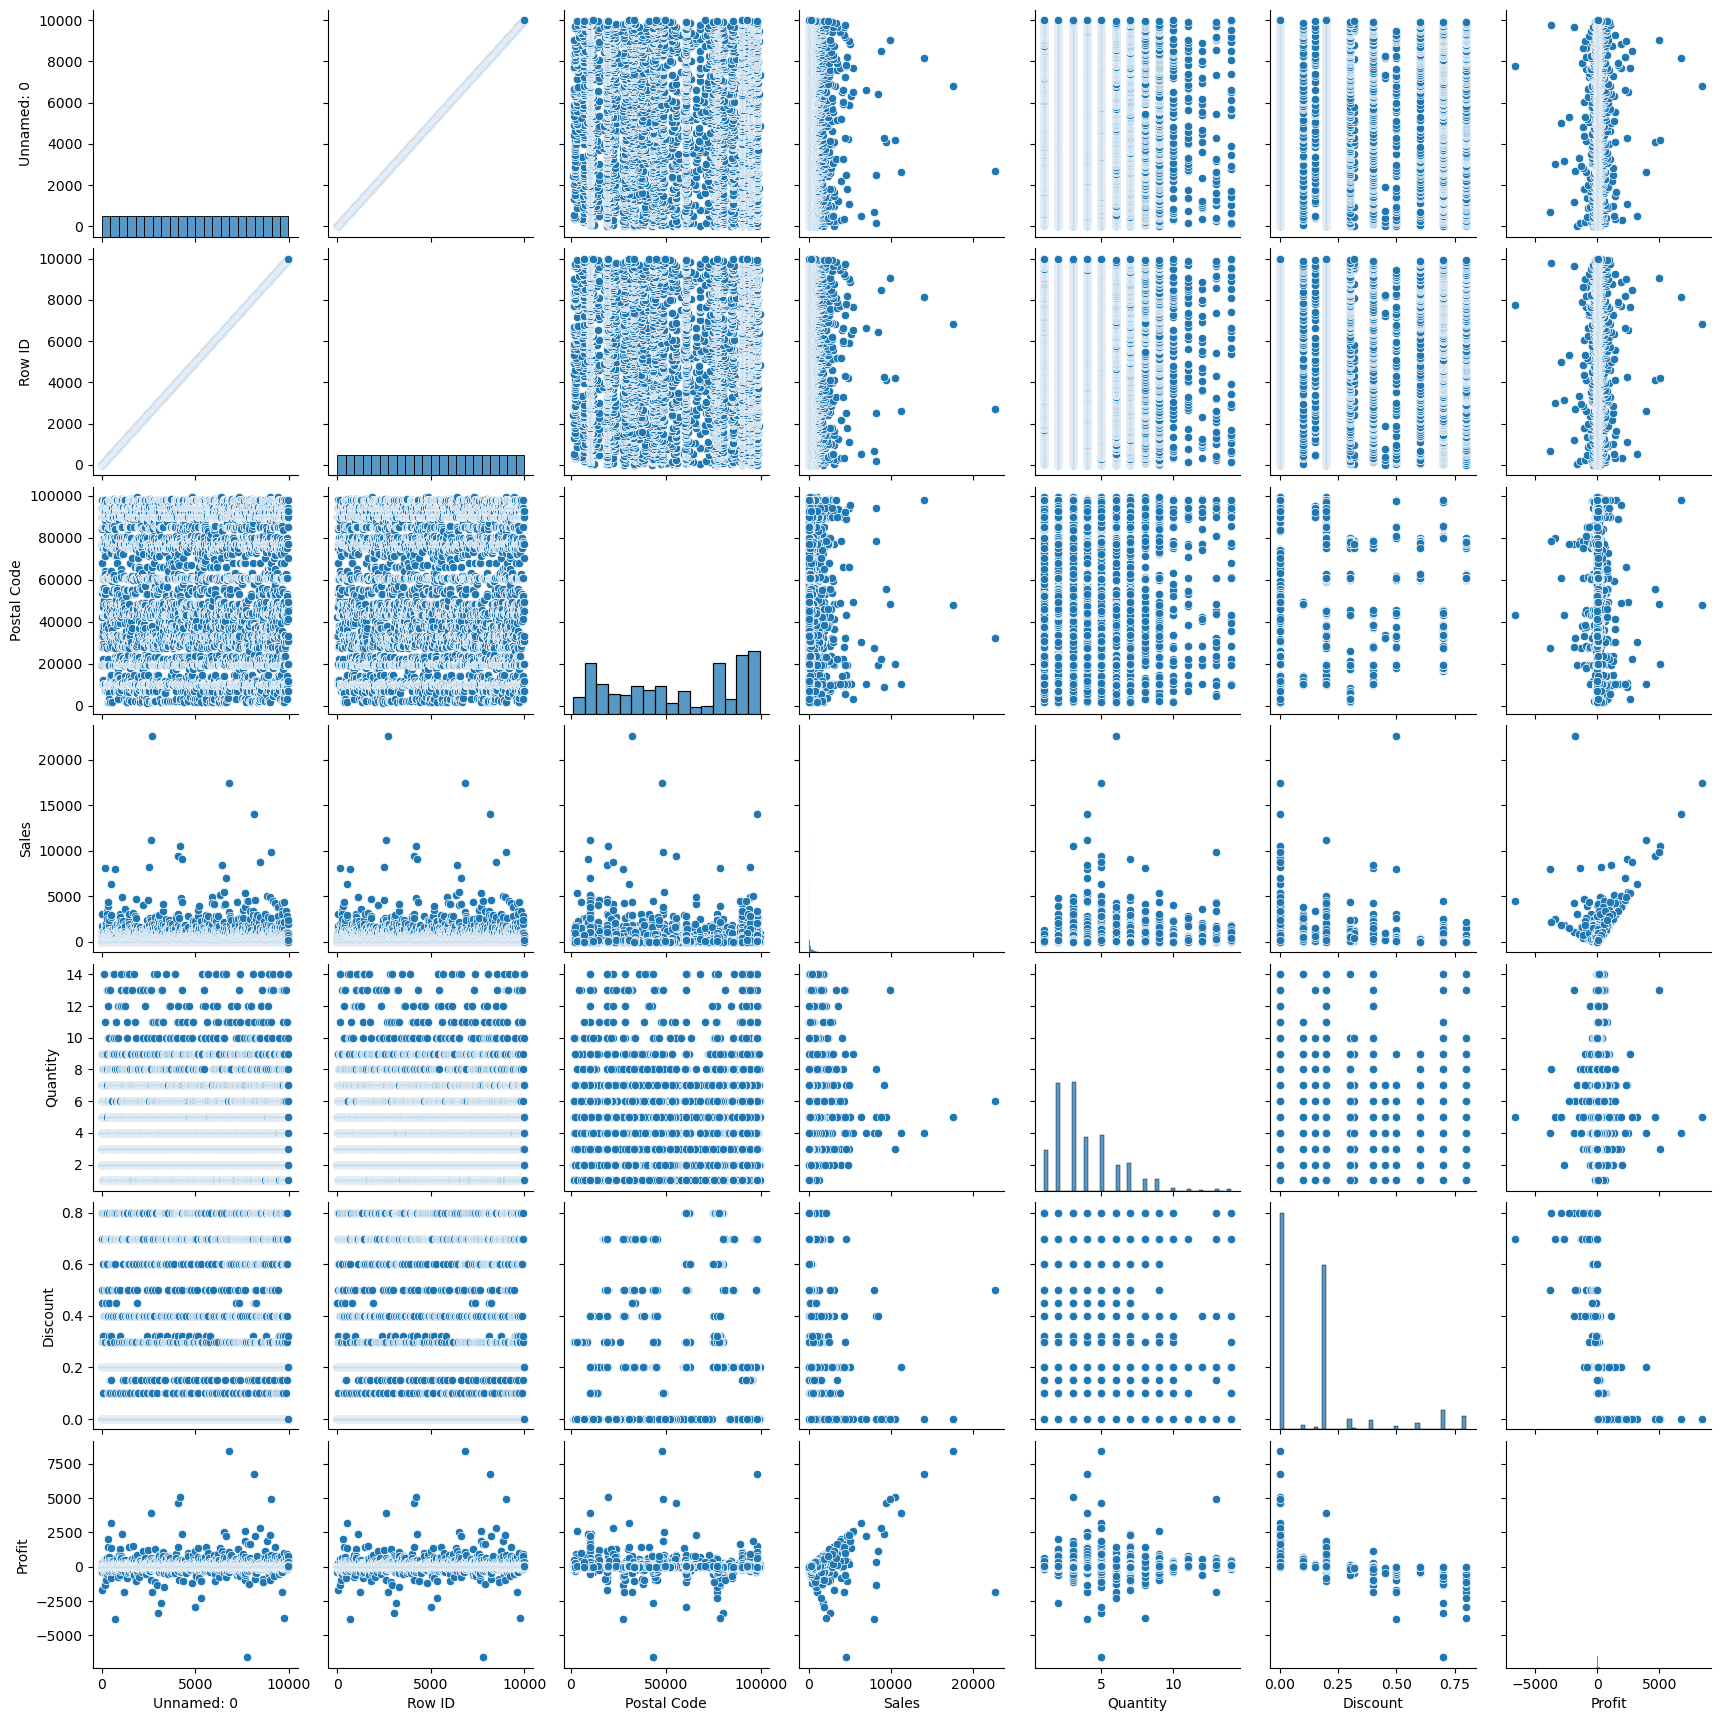

In [16]:
# Explore  data visually
sns.pairplot(df)

C:\Users\bukola\AppData\Local\Temp\ipykernel_19072\1988246215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'], bins=25) # Shows extreme values


<Axes: xlabel='Sales', ylabel='Density'>

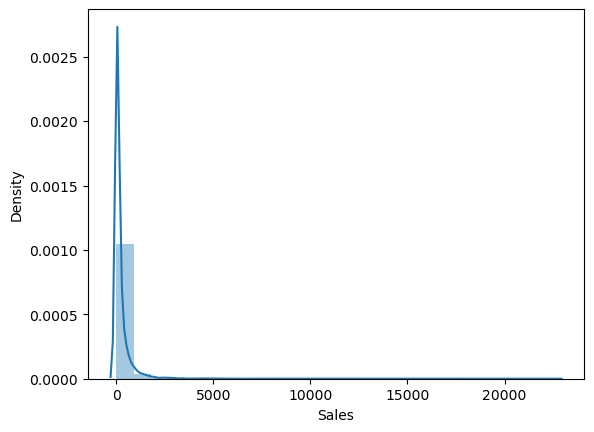

In [17]:
sns.distplot(df['Sales'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\bukola\AppData\Local\Temp\ipykernel_19072\3111946586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'], bins=25) # Shows extreme values


<Axes: xlabel='Quantity', ylabel='Density'>

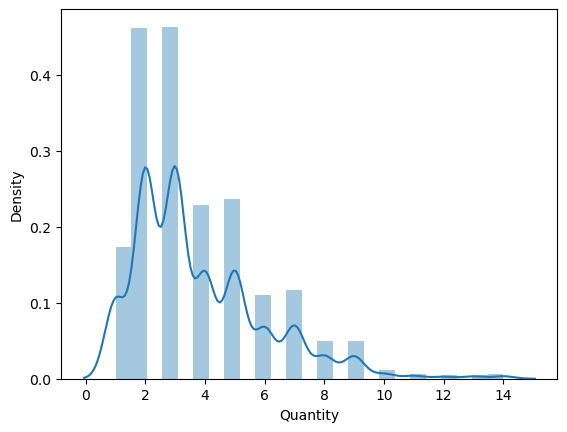

In [18]:
sns.distplot(df['Quantity'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [19]:
df['Sales'].mean()

229.85800083049833

In [20]:
df['Sales'].median()

54.489999999999995

In [21]:
df['Sales'].max()

22638.48

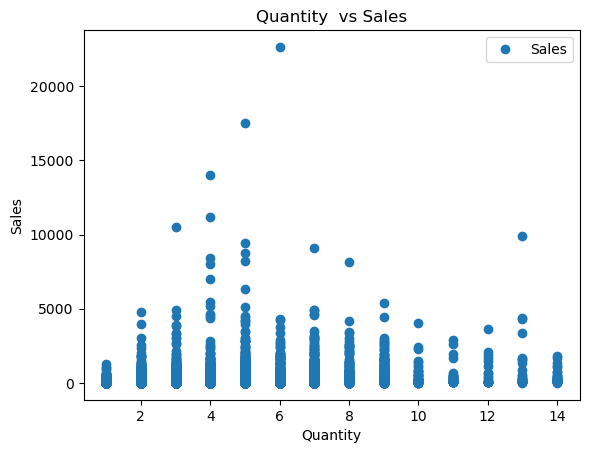

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Quantity', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Quantity  vs Sales')  
plt.xlabel('Quantity')  
plt.ylabel('Sales')  
plt.show()

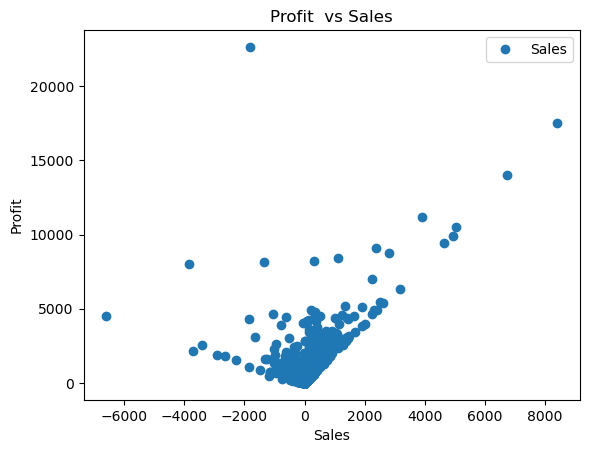

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Profit', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Profit  vs Sales')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Quantity'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [30]:
X

array([[2],
       [3],
       [2],
       ...,
       [2],
       [4],
       [2]], dtype=int64)

In [31]:
y

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

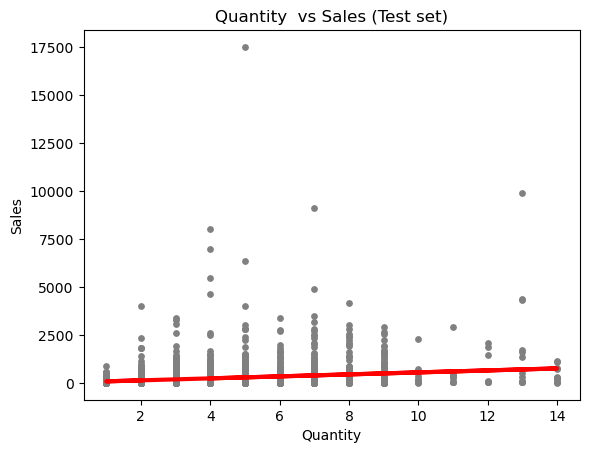

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Quantity  vs Sales (Test set)')
plot_test.xlabel('Quantity')
plot_test.ylabel('Sales')
plot_test.show()

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[51.74971137]]
Mean squared error:  401242.30060924694
R2 score:  0.05159973399131068


In [39]:
y_predicted

array([[133.96426427],
       [133.96426427],
       [ 82.2145529 ],
       ...,
       [133.96426427],
       [185.71397564],
       [237.46368701]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,23.3600,133.964264
1,22.6600,133.964264
2,35.2080,82.214553
3,283.9200,289.213398
4,19.8240,340.963110
5,39.9200,133.964264
6,68.4800,133.964264
7,1591.0200,340.963110
8,156.3728,133.964264
9,3499.9300,392.712821


In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[51.74971137]]
Mean squared error:  360672.56083376845
R2 score:  0.034250091935880356


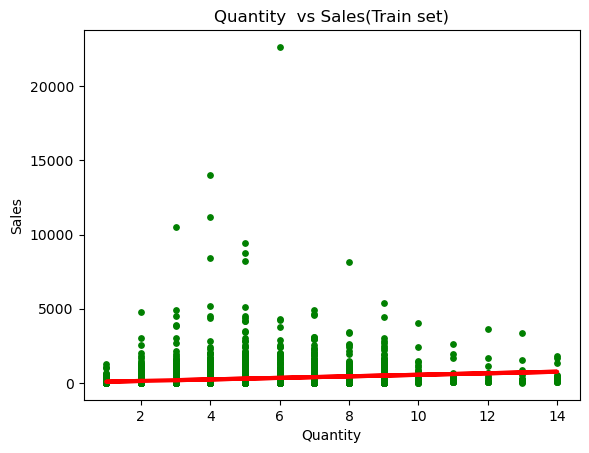

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Quantity  vs Sales(Train set)')
plot_test.xlabel('Quantity')
plot_test.ylabel('Sales')
plot_test.show()

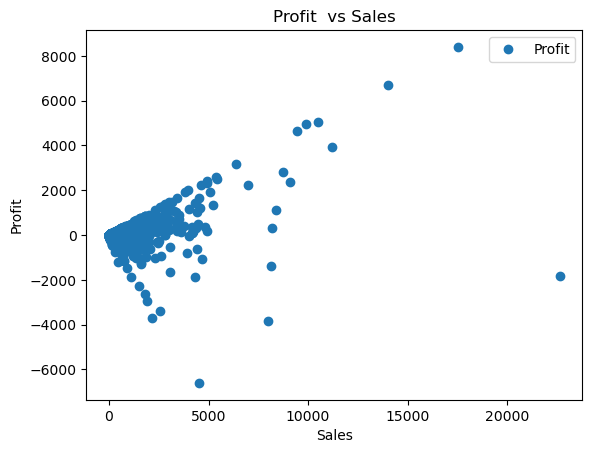

In [77]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Profit  vs Sales')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [78]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [79]:
X

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [80]:
y

array([[ 41.9136],
       [219.582 ],
       [  6.8714],
       ...,
       [ 19.3932],
       [ 13.32  ],
       [ 72.948 ]])

In [81]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
#Regression analysis
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [83]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [84]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

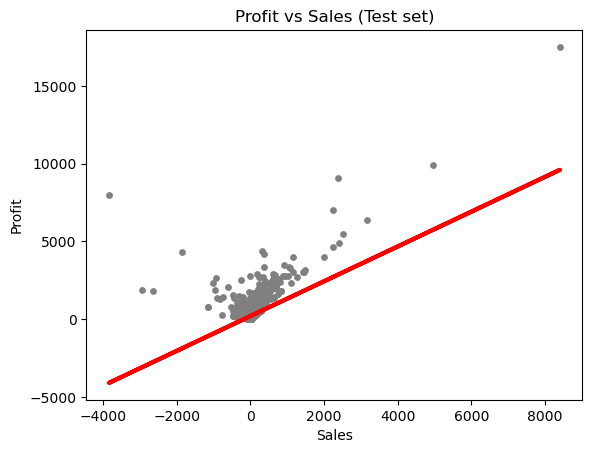

In [54]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Profit vs Sales (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [85]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [86]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  51349.12515884883
R2 score:  0.3077658276293924


#The slope is a coefficient that tells you how the y variable changes when X changes. A negative slope value indicates a negative relationship (as X rises, y drops), and a positive slope indicates a positive relationship (as X rises, so does y). A coefficient of zero would mean that as X rises, y stays the same.

Here, you we a positive relationship, so the coefficient is Positive, too. The slope here means that as X rises (as the Sales increases the profit realises also rises), y slightly drops (sales) at a degree of 0.14.

The RSME is very high at 51349 units which shows the model is not a good fit. 

In [87]:
y_predicted

array([[-1.75662967e+00],
       [-1.85432558e+00],
       [-1.03056552e-01],
       ...,
       [ 2.45360996e+02],
       [ 2.87136531e+00],
       [ 2.24946104e+00]])

In [88]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11.6800,-1.756630
1,9.7438,-1.854326
2,2.6406,-0.103057
3,17.7450,34.608581
4,6.4428,-2.250134
5,12.9740,0.554577
6,25.6800,4.540570
7,286.3836,217.034764
8,-52.8908,16.807380
9,909.9818,483.452915


In [89]:
#Compare how the regression fits the training set
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [90]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [91]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  39304.14892651181
R2 score:  0.1561773119538582


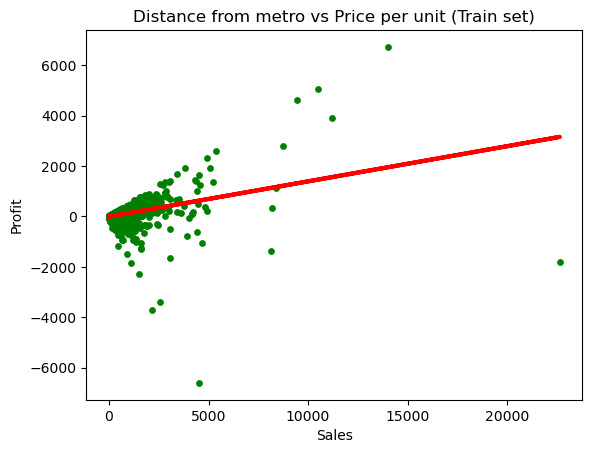

In [92]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [93]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Sales'] >=0] 

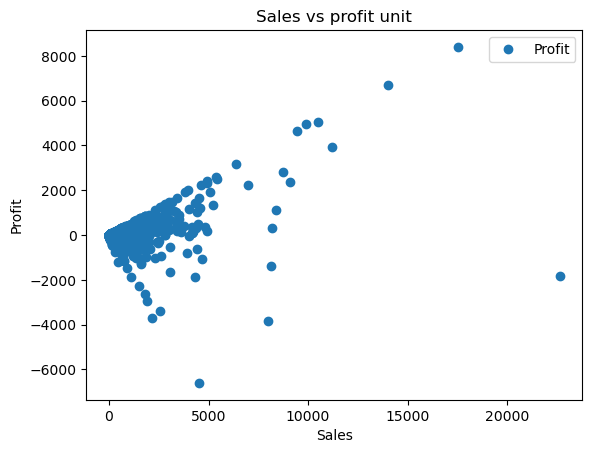

In [94]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Sales', y='Profit', style='o')  
plt.title('Sales vs profit unit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [95]:
# Reshape again.

X_2 = df_test['Profit'].values.reshape(-1,1)
y_2 = df_test['Sales'].values.reshape(-1,1)

In [96]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [97]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [98]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [99]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [100]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.11902448]]
Mean squared error:  266655.0021279805
R2 score:  0.36971831093898344


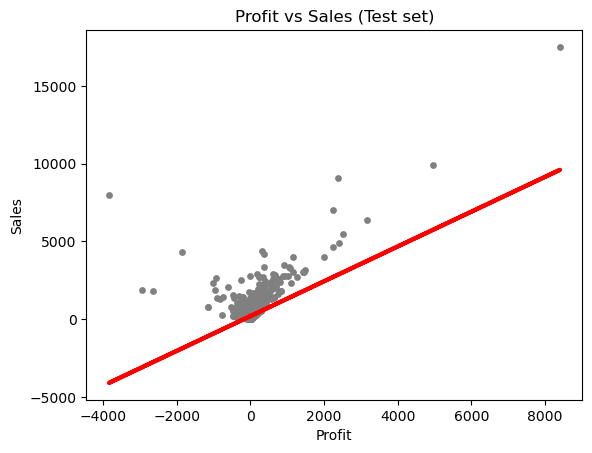

In [102]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Profit vs Sales (Test set)')
plot_test.xlabel('Profit')
plot_test.ylabel('Sales')
plot_test.show()

In [103]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,23.3600,208.929589
1,22.6600,206.762933
2,35.2080,198.814279
3,283.9200,215.716472
4,19.8240,203.069034
5,39.9200,210.377606
6,68.4800,224.595931
7,1591.0200,516.329641
8,156.3728,136.673283
9,3499.9300,1214.151291
